In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
X = [ 17, 35, 39, 21, 22, 45]
X = np.array(X).reshape(-1, 1)
# o = orange , l = lemon
y_names = ['l', 'o', 'o', 'l', 'l', 'o']
# label/target/class
y = [0,1,1,0,0,1] # encryped y_names => y

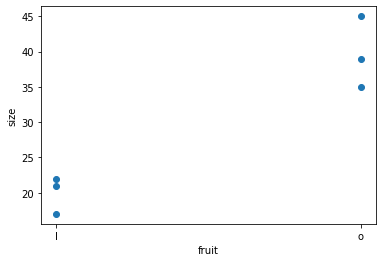

In [4]:
plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names, X)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [6]:
d = [25, 30, 90, 5, 45, ]
data = np.array(d).reshape(-1,1)
# data = [[25]]
y_predict = model.predict(data)
y_predict # 0 = lemon, 1 = orange

array([0, 1, 1, 0, 1])

In [7]:
for i, y in enumerate(y_predict):
    if y == 0:
        print('size' + f' {d[i]} ' + 'is filtered to lemon')
    else:
        print(f'size {d[i]} is filtered to orange')

size 25 is filtered to lemon
size 30 is filtered to orange
size 90 is filtered to orange
size 5 is filtered to lemon
size 45 is filtered to orange


In [8]:
class_names = ['lemon', 'orange']
for i in range(len(y_predict)):
    print(f'Size {d[i]} : { class_names[0] if y_predict[i] == 0 else class_names[1]}')

Size 25 : lemon
Size 30 : orange
Size 90 : orange
Size 5 : lemon
Size 45 : orange


In [9]:
# for real-app use Tkinter to make UI
# while True:
#     size = eval(input("Size :"))
#     data = [[size]]
#     y_predict = model.predict(data)
#     result = class_names[y_predict[0]]
#     print(result)
# print('done')

In [10]:
import graphviz
import pydotplus

In [11]:
model

DecisionTreeClassifier()

In [12]:
# very few basic of graphviz
dot = graphviz.Digraph(comment='The Round Table')
dot.node('A', 'Authur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL']) # A to B,L
dot.edge('B', 'L', constraint='false')
dot.render('graph', view=True)

'graph.pdf'

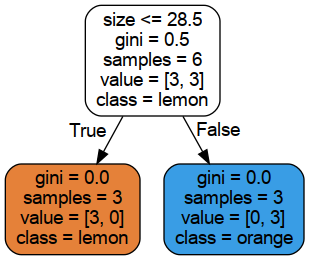

In [13]:
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names = ['size']
fruit_types = ['lemon', 'orange']

dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names=fruit_types,
                          filled=True,
                          rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

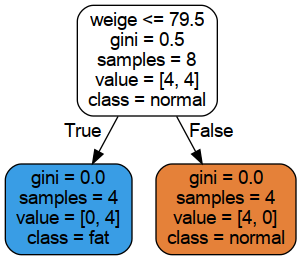

In [14]:
X = np.array([60, 65, 74, 68] + [85, 90, 95, 100]).reshape(-1, 1)
# n = normal, f = fat
y = np.array(['n', 'n', 'n', 'n'] + ['f', 'f', 'f', 'f']).reshape(-1, 1)
model.fit(X, y)

data_feature_names = ['weige']
body_types = ['normal', 'fat']
dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names=body_types,
                          filled=True,
                          rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [15]:
df = sns.load_dataset('penguins')
# df.head()
df.pivot_table(index=df.species, aggfunc='count', )

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex
species,,,,,,
Adelie,151,151,151,151,152,146
Chinstrap,68,68,68,68,68,68
Gentoo,123,123,123,123,124,119


In [16]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

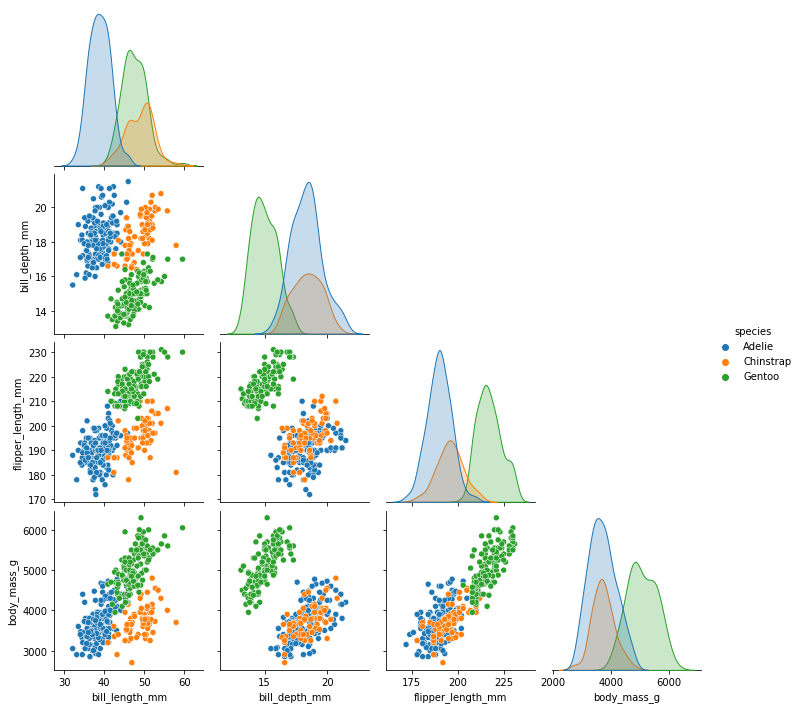

In [17]:
sns.pairplot(data=df, corner=True, hue='species') 

In [18]:
df.isnull().sum()
df.dropna(inplace=True)

In [19]:
# body_mass_g => species
model = DecisionTreeClassifier()
X = df.body_mass_g.values.reshape(-1, 1)
y = df.species.values.reshape(-1, 1)
# y


In [20]:
from sklearn.preprocessing import LabelEncoder
species_code = LabelEncoder().fit_transform(df.species)
# species_code
df['species_code'] = pd.Series(species_code)
# df.isnull().sum()
# df.dropna(inplace=True)
# df[df.species_code.isnull()]
# sns.scatterplot(x=species_code, y=df.body_mass_g)

In [21]:
from sklearn.preprocessing import LabelEncoder
species_code = LabelEncoder().fit_transform(df.species)
# species_code
df['species_code'] = pd.Series(species_code)
# df.isnull().sum()
df.dropna(inplace=True)
# df[df.species_code.isnull()]
# sns.scatterplot(x=species_code, y=df.body_mass_g)

In [22]:
model.fit(X=X, y=y)

model.predict([[10000]])

array(['Gentoo'], dtype=object)

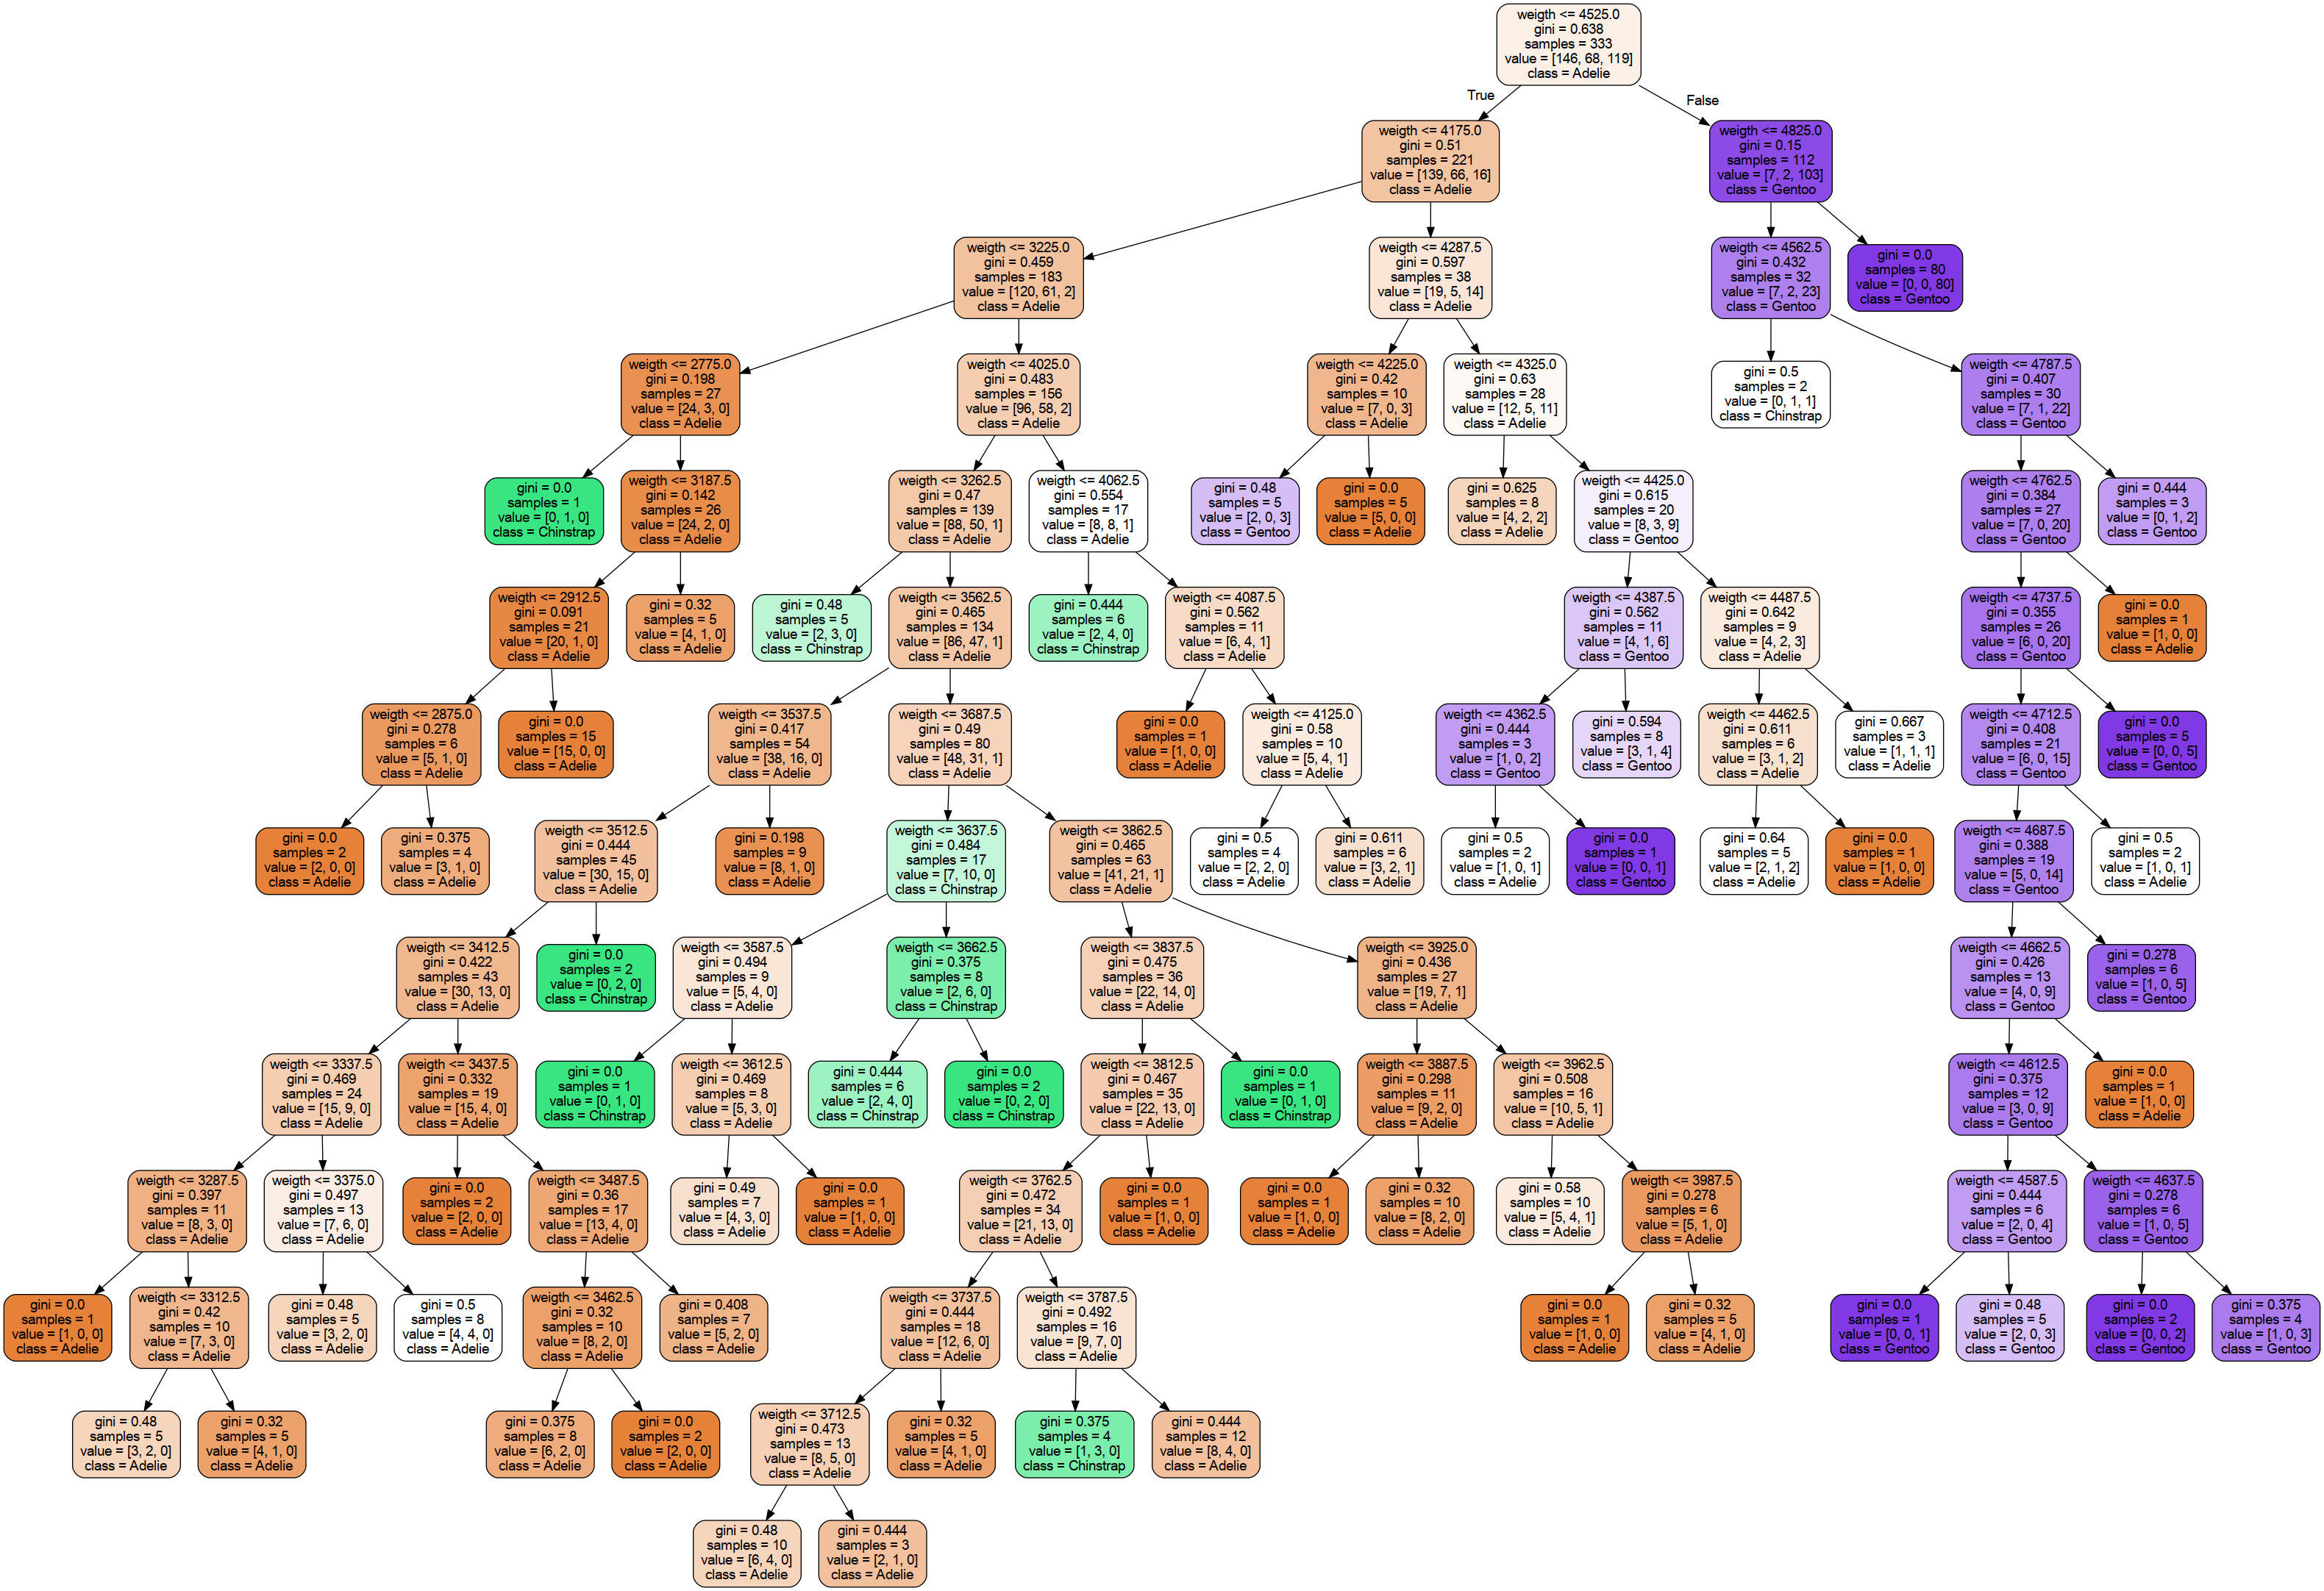

In [23]:
data_feature_names = ['weigth']
names = df.species.unique()
dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names=names,
                          filled=True,
                          rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

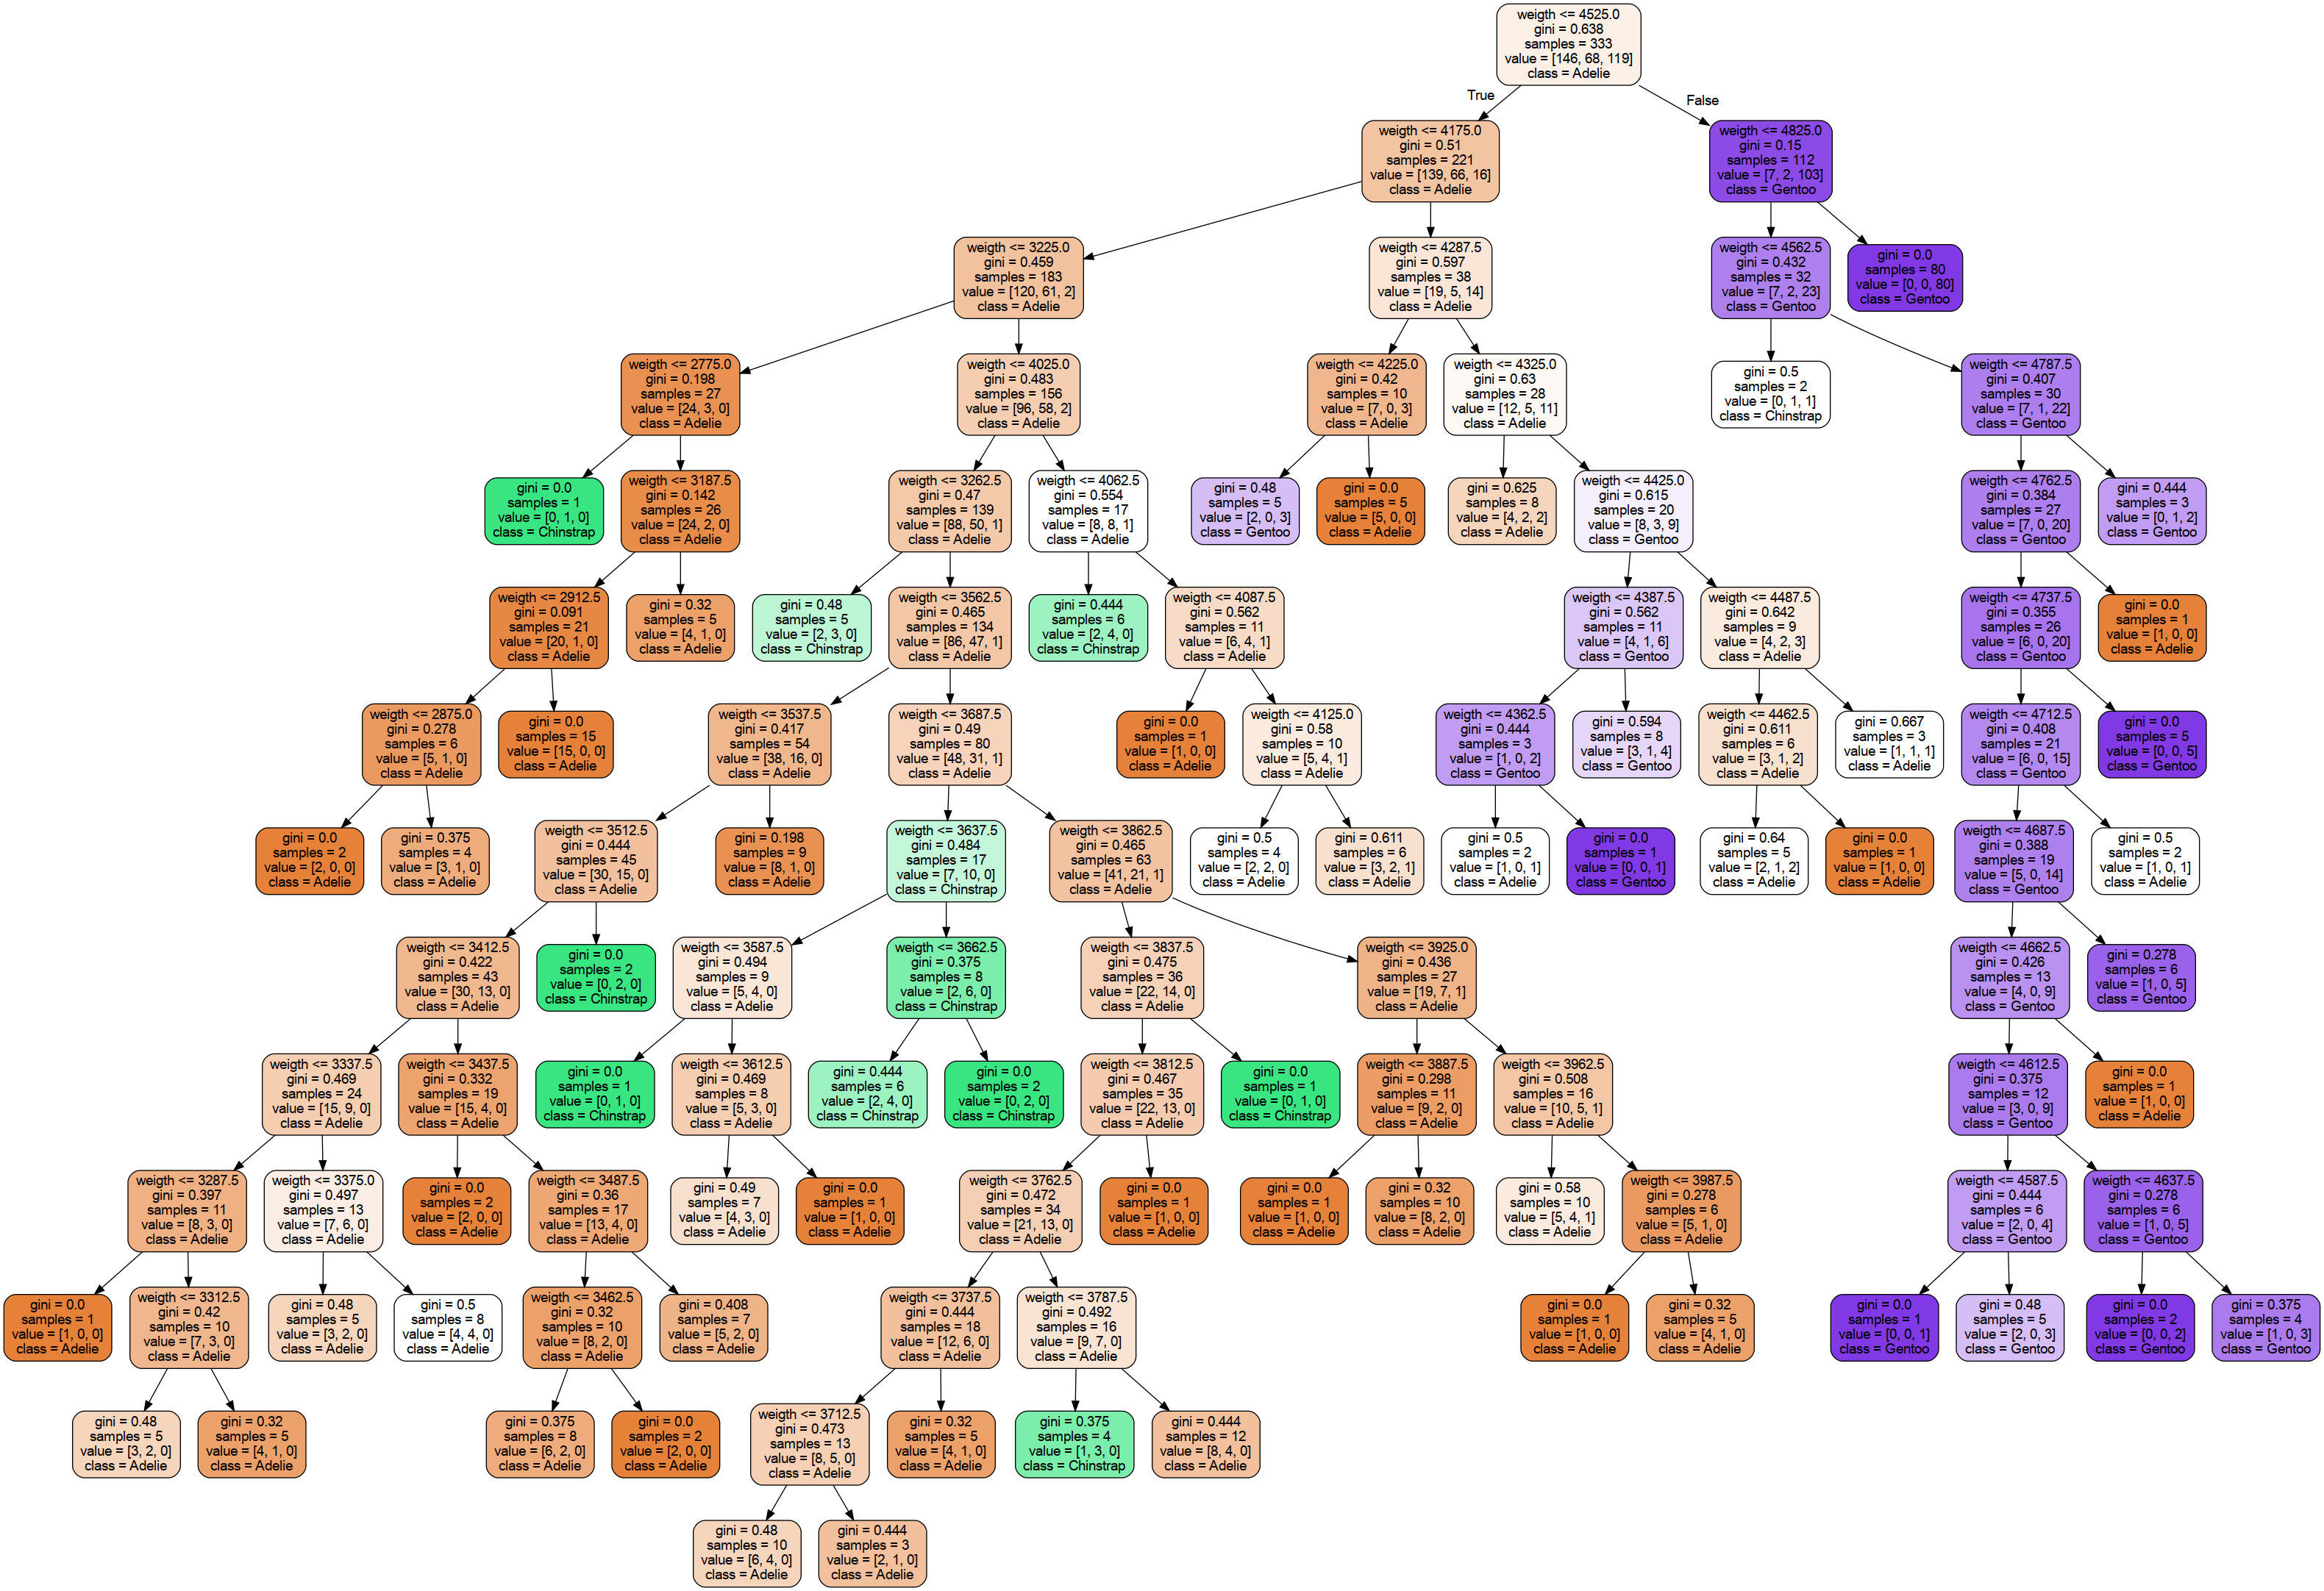

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('penguins-tree-classified-by-mass.png')

Image(graph.create_png())

In [29]:
# df.head()
# df.isnull().sum()
model = DecisionTreeClassifier(max_depth=3,
                    max_leaf_nodes=20, 
                    min_impurity_decrease=0.0001,
                    min_samples_leaf=4,
                                random_state=0)
X_train = df.body_mass_g.values.reshape(-1, 1)
y_train =df.species_code.values.reshape(-1, 1) 
model.fit(X=X_train,
         y=y_train)

feature_names = ['body_mass']
specie_types = df.species.unique() 

dot_data = export_graphviz(model, out_file=None,
                          feature_names=feature_names,
                          class_names=specie_types,
                          filled=True,
                          rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

# Viz Heatmap Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_test = X_train  
y_predict = model.predict(X_test)
print('Accuracy score : {}'. format(accuracy_score(y_train, y_predict)* 100))
print(classification_report(y_train, y_predict,  target_names=specie_types))
cm = confusion_matrix(y_train, y_predict)
print(cm)

Accuracy score : 70.37037037037037
              precision    recall  f1-score   support

      Adelie       0.60      0.95      0.74       140
   Chinstrap       0.00      0.00      0.00        68
      Gentoo       0.91      0.82      0.86       116

    accuracy                           0.70       324
   macro avg       0.51      0.59      0.53       324
weighted avg       0.59      0.70      0.63       324

[[133   0   7]
 [ 66   0   2]
 [ 21   0  95]]


/home/liberio/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liberio/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/liberio/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


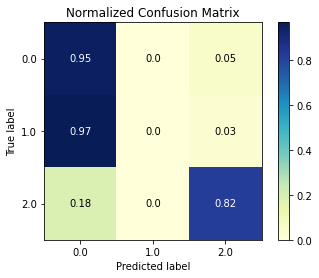

In [49]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_train, y_predict, normalize=True,
                                    cmap='YlGnBu'
                               )
plt.show()